<a href="https://colab.research.google.com/github/viniciuspxc/SO_Trabalho02_RoundRobin/blob/main/SO_Trabalho02_RoundRobin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Escalonamento Round Robin

In [155]:
# Questões
# • Todos os N processos tem o mesmo tempo de chegada.
# • 1 unidade de tempo é gasto para a mudança de contexto do processo.
# • Tempo médio de espera: Tempo médio que um processo passa no estado de pronto antes de ser executado.
# • Tempo médio de retorno: Tempo médio que um processo leva para ser concluído apos sua chegada ao sistema.
# • Vazão: Quantidade de processos que são concluídos em um determinado período de tempo.
# • Produza gráficos.

In [156]:
import random
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.express as px

In [157]:
def round_robin(qnt_processos, max_burst, min_burst, quantum_list):
  # Chegada dos processos
  fila_processos = []
  for n in range(qnt_processos):
      burst_time = random.randint(min_burst, max_burst)
      fila_processos.append(("p"+str(n)+" burst="+str(burst_time),burst_time))
      # print("Adicionando processo", n, "à fila")

  # Escalonador Round-Robin
  time_table = escalonador(fila_processos, quantum_list)
  return time_table


def escalonador(fila_processos, quantum_list):
    time_table = pd.DataFrame(columns = ['quantum','processo', 'inicio', 'duracao', 'fim', 'retorno'])

    for quantum in quantum_list:
      unidade_tempo = 0
      fila_exec = fila_processos.copy()
      while len(fila_exec) > 0:
          n, remaining_time = fila_exec.pop(0)
          # print("\nProcesso", n, "BurstTime =", remaining_time, "und")

          tempo_inicio = unidade_tempo

          reamining_time = processo(n, remaining_time, quantum)

          if(reamining_time > 0):
            unidade_tempo += (quantum + 1) # processo interrompido
            fila_exec.append((n, reamining_time))
            conclusao = 0
          else:
            unidade_tempo += remaining_time # processo executou todo seu tempo restante
            conclusao = 1

          duracao = unidade_tempo-tempo_inicio
          unidade_tempo+=1
          tempo_fim = unidade_tempo
          

          time_table.loc[len(time_table)] = [quantum, n, tempo_inicio, duracao, tempo_fim, conclusao]
          
    return time_table


def processo(n, remaining_time, quantum):
    tempo_processando = 0
    while remaining_time > 0:
      if tempo_processando == quantum:
        # print("  Interrompido (quantum = "+ str(quantum)+')')
        return remaining_time

      # print(" ", n, "remaining =", remaining_time, "s")
      remaining_time -= 1
      tempo_processando += 1
    # print(" ", n, "completo")
    return remaining_time

# Exemplo A
qnt_processos = 5, max_burst = 3, min_burst = 1.

## A. Execução

In [158]:
# Parametros
qnt_processos = 5
max_burst = 3
min_burst = 1
quantum_list = list(range(min_burst, max_burst+2))

time_table = round_robin(qnt_processos, max_burst, min_burst, quantum_list)

### A. Tabelas

In [159]:
time_table

,quantum,processo,inicio,duracao,fim,retorno
0,1,p0 burst=3,0,2,3,0
1,1,p1 burst=1,3,1,5,1
2,1,p2 burst=1,5,1,7,1
3,1,p3 burst=1,7,1,9,1
4,1,p4 burst=3,9,2,12,0
5,1,p0 burst=3,12,2,15,0
6,1,p4 burst=3,15,2,18,0
7,1,p0 burst=3,18,1,20,1
8,1,p4 burst=3,20,1,22,1
9,2,p0 burst=3,0,3,4,0


In [160]:
tabela = []
for quantum in quantum_list:
  tabela.append(time_table[time_table['quantum']==quantum])

In [161]:
media_espera = time_table.groupby(['quantum'])['inicio'].mean().round(2).reset_index()
media_espera

,quantum,inicio
0,1,9.89
1,2,8.29
2,3,5.60
3,4,5.60


In [162]:
media_retorno = time_table[time_table['retorno']== 1].groupby(['quantum'])['fim'].mean().round(2).reset_index()
media_retorno

,quantum,fim
0,1,12.6
1,2,11.6
2,3,8.4
3,4,8.4


In [163]:
max_quantum = time_table.groupby(['quantum'])['fim'].max().reset_index()
max_quantum['num_quantum'] = (max_quantum['fim']/max_quantum['quantum']).round(2)
max_quantum['vazao'] = (time_table.processo.nunique()/max_quantum['num_quantum']).round(2)
vazao = max_quantum[['quantum', 'vazao']]
vazao

,quantum,vazao
0,1,0.23
1,2,0.56
2,3,1.07
3,4,1.43


## A. Gráficos

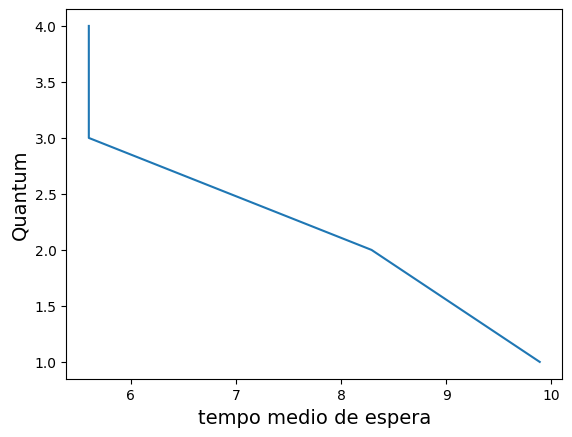

In [164]:
plot_table = media_espera
fig,ax = plt.subplots()
ax.plot(plot_table.inicio,
        plot_table.quantum,
        )
ax.set_xlabel("tempo medio de espera", fontsize = 14)
ax.set_ylabel("Quantum",fontsize=14)
plt.show()

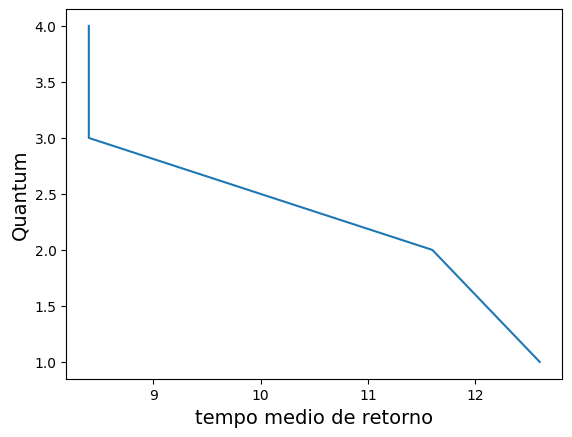

In [165]:
plot_table = media_retorno
fig,ax = plt.subplots()
ax.plot(plot_table.fim,
        plot_table.quantum,
        )
ax.set_xlabel("tempo medio de retorno", fontsize = 14)
ax.set_ylabel("Quantum",fontsize=14)
plt.show()

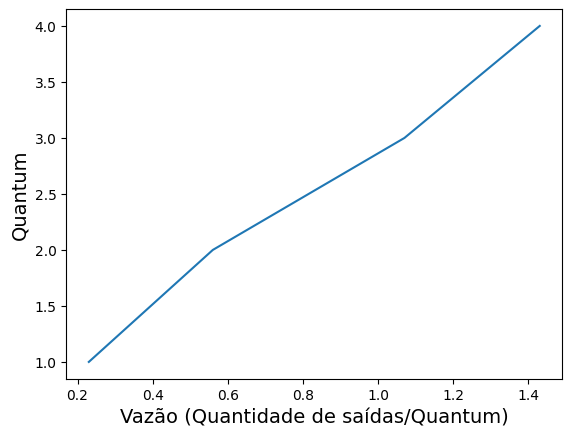

In [166]:
plot_table = vazao
fig,ax = plt.subplots()
ax.plot(plot_table.vazao,
        plot_table.quantum,
        )
ax.set_xlabel("Vazão (Quantidade de saídas/Quantum)", fontsize = 14)
ax.set_ylabel("Quantum",fontsize=14)
plt.show()

In [167]:
for quantum_table in tabela:
  fig = px.bar(
      quantum_table, 
      base="inicio", 
      x="duracao", 
      y="processo", 
      color=quantum_table["processo"].astype(str),
      template= "plotly_dark",
      labels={
              "duracao": "Tempo",
              "processo": "Nome do Processo"
             },
      title="Quantum = "+str(quantum_table['quantum'].iloc[0]),
      ).update_layout(showlegend=False, yaxis_type="category")
  fig.show()

# Exemplo B
qnt_processos = 5, max_burst = 5, min_burst = 1.

## B. Execução

In [168]:
# Parametros
qnt_processos = 5
max_burst = 5
min_burst = 1
quantum_list = list(range(min_burst, max_burst+2))

time_table = round_robin(qnt_processos, max_burst, min_burst, quantum_list)

### B. Tabelas

In [169]:
time_table

,quantum,processo,inicio,duracao,fim,retorno
0,1,p0 burst=1,0,1,2,1
1,1,p1 burst=1,2,1,4,1
2,1,p2 burst=1,4,1,6,1
3,1,p3 burst=5,6,2,9,0
4,1,p4 burst=3,9,2,12,0
5,1,p3 burst=5,12,2,15,0
6,1,p4 burst=3,15,2,18,0
7,1,p3 burst=5,18,2,21,0
8,1,p4 burst=3,21,1,23,1
9,1,p3 burst=5,23,2,26,0


In [170]:
tabela = []
for quantum in quantum_list:
  tabela.append(time_table[time_table['quantum']==quantum])

In [171]:
media_espera = time_table.groupby(['quantum'])['inicio'].mean().round(2).reset_index()
media_espera

,quantum,inicio
0,1,12.36
1,2,9.25
2,3,6.33
3,4,6.67
4,5,4.80
5,6,4.80


In [172]:
media_retorno = time_table[time_table['retorno']== 1].groupby(['quantum'])['fim'].mean().round(2).reset_index()
media_retorno

,quantum,fim
0,1,12.6
1,2,10.8
2,3,9.0
3,4,9.2
4,5,8.0
5,6,8.0


In [173]:
max_quantum = time_table.groupby(['quantum'])['fim'].max().reset_index()
max_quantum['num_quantum'] = (max_quantum['fim']/max_quantum['quantum']).round(2)
max_quantum['vazao'] = (time_table.processo.nunique()/max_quantum['num_quantum']).round(2)
vazao = max_quantum[['quantum', 'vazao']]
vazao

,quantum,vazao
0,1,0.18
1,2,0.45
2,3,0.83
3,4,1.11
4,5,1.56
5,6,1.87


## B. Gráficos

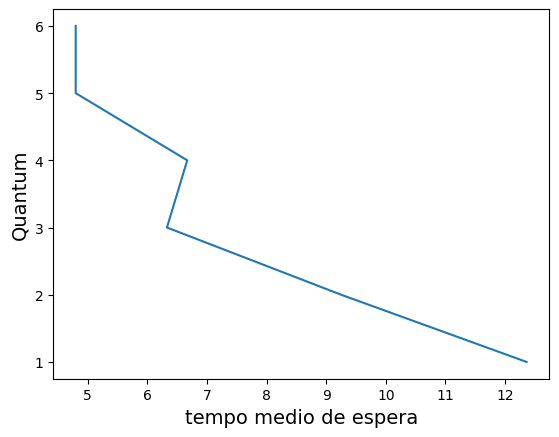

In [174]:
plot_table = media_espera
fig,ax = plt.subplots()
ax.plot(plot_table.inicio,
        plot_table.quantum,
        )
ax.set_xlabel("tempo medio de espera", fontsize = 14)
ax.set_ylabel("Quantum",fontsize=14)
plt.show()

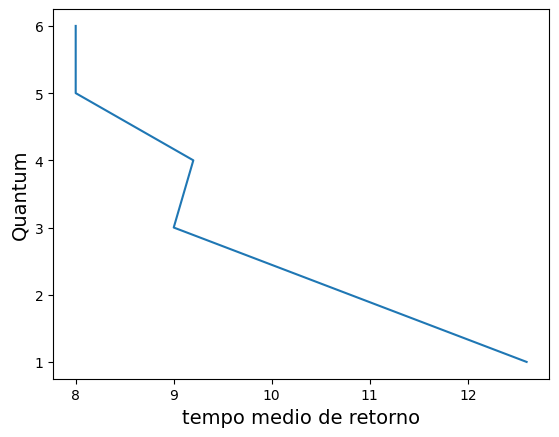

In [175]:
plot_table = media_retorno
fig,ax = plt.subplots()
ax.plot(plot_table.fim,
        plot_table.quantum,
        )
ax.set_xlabel("tempo medio de retorno", fontsize = 14)
ax.set_ylabel("Quantum",fontsize=14)
plt.show()

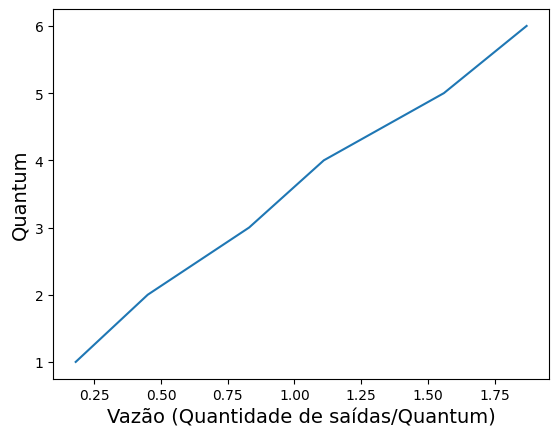

In [176]:
plot_table = vazao
fig,ax = plt.subplots()
ax.plot(plot_table.vazao,
        plot_table.quantum,
        )
ax.set_xlabel("Vazão (Quantidade de saídas/Quantum)", fontsize = 14)
ax.set_ylabel("Quantum",fontsize=14)
plt.show()

In [177]:
for quantum_table in tabela:
  fig = px.bar(
      quantum_table, 
      base="inicio", 
      x="duracao", 
      y="processo", 
      color=quantum_table["processo"].astype(str),
      template= "plotly_dark",
      labels={
              "duracao": "Tempo",
              "processo": "Nome do Processo"
             },
      title="Quantum = "+str(quantum_table['quantum'].iloc[0]),
      ).update_layout(showlegend=False, yaxis_type="category")
  fig.show()

# Exemplo C
qnt_processos = 5, max_burst = 5, min_burst = 3.

## C. Execução

In [178]:
# Parametros
qnt_processos = 5
max_burst = 5
min_burst = 3
quantum_list = list(range(min_burst, max_burst+2))

time_table = round_robin(qnt_processos, max_burst, min_burst, quantum_list)

### C. Tabelas

In [179]:
time_table

,quantum,processo,inicio,duracao,fim,retorno
0,3,p0 burst=4,0,4,5,0
1,3,p1 burst=4,5,4,10,0
2,3,p2 burst=5,10,4,15,0
3,3,p3 burst=4,15,4,20,0
4,3,p4 burst=4,20,4,25,0
5,3,p0 burst=4,25,1,27,1
6,3,p1 burst=4,27,1,29,1
7,3,p2 burst=5,29,2,32,1
8,3,p3 burst=4,32,1,34,1
9,3,p4 burst=4,34,1,36,1


In [180]:
tabela = []
for quantum in quantum_list:
  tabela.append(time_table[time_table['quantum']==quantum])

In [181]:
media_espera = time_table.groupby(['quantum'])['inicio'].mean().round(2).reset_index()
media_espera

,quantum,inicio
0,3,19.7
1,4,13.0
2,5,10.4
3,6,10.4


In [182]:
media_retorno = time_table[time_table['retorno']== 1].groupby(['quantum'])['fim'].mean().round(2).reset_index()
media_retorno

,quantum,fim
0,3,31.6
1,4,18.0
2,5,15.6
3,6,15.6


In [183]:
max_quantum = time_table.groupby(['quantum'])['fim'].max().reset_index()
max_quantum['num_quantum'] = (max_quantum['fim']/max_quantum['quantum']).round(2)
max_quantum['vazao'] = (time_table.processo.nunique()/max_quantum['num_quantum']).round(2)
vazao = max_quantum[['quantum', 'vazao']]
vazao

,quantum,vazao
0,3,0.42
1,4,0.71
2,5,0.96
3,6,1.15


## C. Gráficos

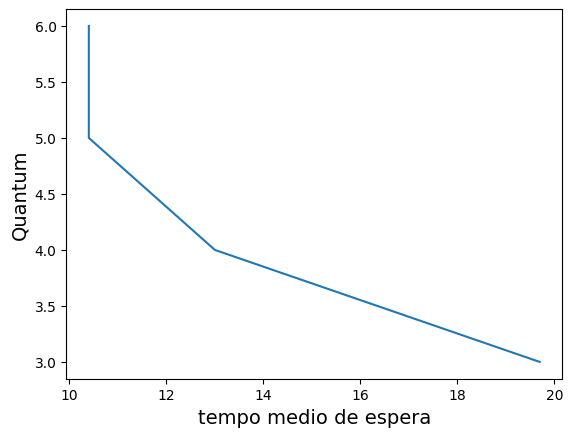

In [184]:
plot_table = media_espera
fig,ax = plt.subplots()
ax.plot(plot_table.inicio,
        plot_table.quantum,
        )
ax.set_xlabel("tempo medio de espera", fontsize = 14)
ax.set_ylabel("Quantum",fontsize=14)
plt.show()

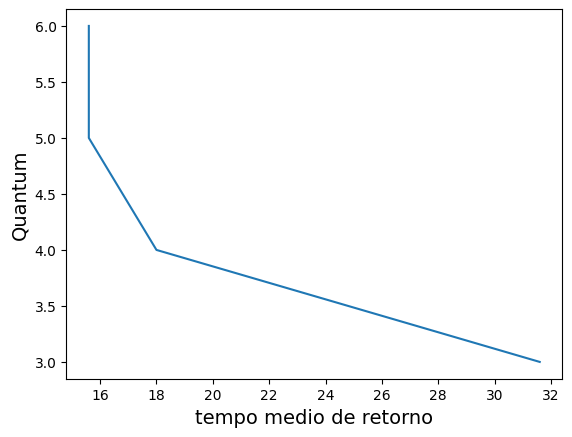

In [185]:
plot_table = media_retorno
fig,ax = plt.subplots()
ax.plot(plot_table.fim,
        plot_table.quantum,
        )
ax.set_xlabel("tempo medio de retorno", fontsize = 14)
ax.set_ylabel("Quantum",fontsize=14)
plt.show()

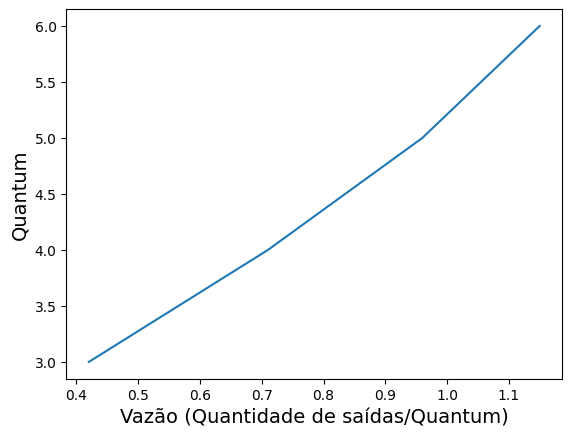

In [186]:
plot_table = vazao
fig,ax = plt.subplots()
ax.plot(plot_table.vazao,
        plot_table.quantum,
        )
ax.set_xlabel("Vazão (Quantidade de saídas/Quantum)", fontsize = 14)
ax.set_ylabel("Quantum",fontsize=14)
plt.show()

In [187]:
for quantum_table in tabela:
  fig = px.bar(
      quantum_table, 
      base="inicio", 
      x="duracao", 
      y="processo", 
      color=quantum_table["processo"].astype(str),
      template= "plotly_dark",
      labels={
              "duracao": "Tempo",
              "processo": "Nome do Processo"
             },
      title="Quantum = "+str(quantum_table['quantum'].iloc[0]),
      ).update_layout(showlegend=False, yaxis_type="category")
  fig.show()

# Exemplo D
qnt_processos = 7, max_burst = 4, min_burst = 1.

## D. Execução

In [188]:
# Parametros
qnt_processos = 7
max_burst = 4
min_burst = 1
quantum_list = list(range(min_burst, max_burst+2))

time_table = round_robin(qnt_processos, max_burst, min_burst, quantum_list)

### D. Tabelas

In [189]:
time_table

,quantum,processo,inicio,duracao,fim,retorno
0,1,p0 burst=1,0,1,2,1
1,1,p1 burst=3,2,2,5,0
2,1,p2 burst=2,5,2,8,0
3,1,p3 burst=4,8,2,11,0
4,1,p4 burst=2,11,2,14,0
5,1,p5 burst=1,14,1,16,1
6,1,p6 burst=2,16,2,19,0
7,1,p1 burst=3,19,2,22,0
8,1,p2 burst=2,22,1,24,1
9,1,p3 burst=4,24,2,27,0


In [190]:
tabela = []
for quantum in quantum_list:
  tabela.append(time_table[time_table['quantum']==quantum])

In [191]:
media_espera = time_table.groupby(['quantum'])['inicio'].mean().round(2).reset_index()
media_espera

,quantum,inicio
0,1,18.47
1,2,12.00
2,3,11.12
3,4,9.57
4,5,9.57


In [192]:
media_retorno = time_table[time_table['retorno']== 1].groupby(['quantum'])['fim'].mean().round(2).reset_index()
media_retorno

,quantum,fim
0,1,24.71
1,2,16.43
2,3,14.14
3,4,12.71
4,5,12.71


In [193]:
max_quantum = time_table.groupby(['quantum'])['fim'].max().reset_index()
max_quantum['num_quantum'] = (max_quantum['fim']/max_quantum['quantum']).round(2)
max_quantum['vazao'] = (time_table.processo.nunique()/max_quantum['num_quantum']).round(2)
vazao = max_quantum[['quantum', 'vazao']]
vazao

,quantum,vazao
0,1,0.18
1,2,0.54
2,3,0.88
3,4,1.27
4,5,1.59


## D. Gráficos

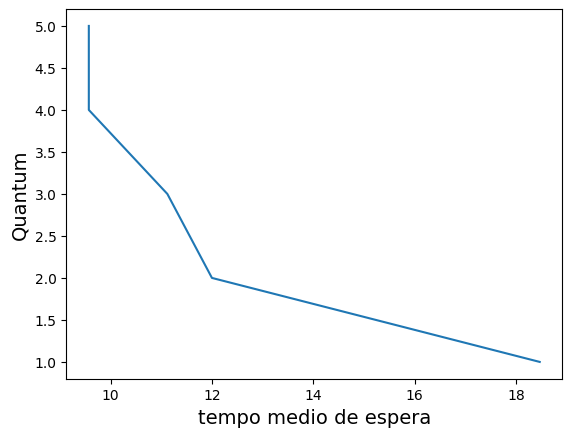

In [194]:
plot_table = media_espera
fig,ax = plt.subplots()
ax.plot(plot_table.inicio,
        plot_table.quantum,
        )
ax.set_xlabel("tempo medio de espera", fontsize = 14)
ax.set_ylabel("Quantum",fontsize=14)
plt.show()

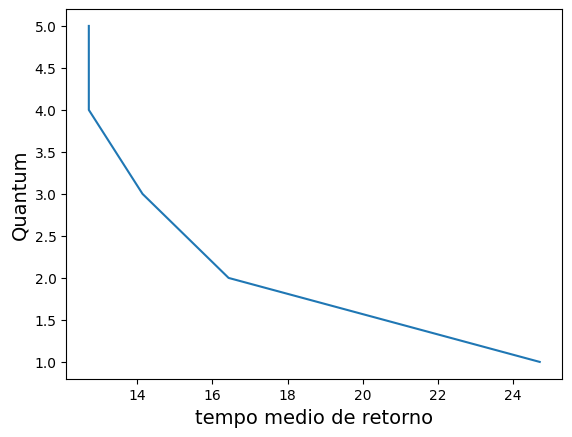

In [195]:
plot_table = media_retorno
fig,ax = plt.subplots()
ax.plot(plot_table.fim,
        plot_table.quantum,
        )
ax.set_xlabel("tempo medio de retorno", fontsize = 14)
ax.set_ylabel("Quantum",fontsize=14)
plt.show()

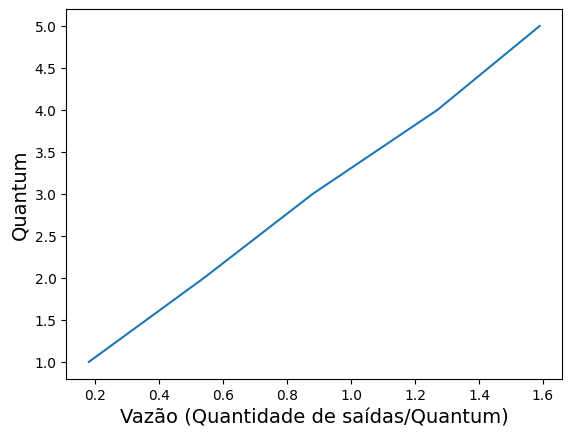

In [196]:
plot_table = vazao
fig,ax = plt.subplots()
ax.plot(plot_table.vazao,
        plot_table.quantum,
        )
ax.set_xlabel("Vazão (Quantidade de saídas/Quantum)", fontsize = 14)
ax.set_ylabel("Quantum",fontsize=14)
plt.show()

In [197]:
for quantum_table in tabela:
  fig = px.bar(
      quantum_table, 
      base="inicio", 
      x="duracao", 
      y="processo", 
      color=quantum_table["processo"].astype(str),
      template= "plotly_dark",
      labels={
              "duracao": "Tempo",
              "processo": "Nome do Processo"
             },
      title="Quantum = "+str(quantum_table['quantum'].iloc[0]),
      ).update_layout(showlegend=False, yaxis_type="category")
  fig.show()